In [ ]:
import numpy as np
import pandas as pd
import cv2

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
ksize=5
sigma=3
lamda=1*np.pi/4
phi=0
gamma= 0.5
theta=1*np.pi/4

In [ ]:
kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)

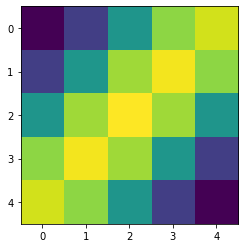

In [ ]:
plt.imshow(kernel)

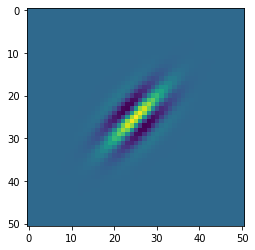

In [ ]:
kernel1=cv2.getGaborKernel((50,50),3,np.pi/4,np.pi/4,0.5,0,ktype=cv2.CV_32F)
plt.imshow(kernel1)



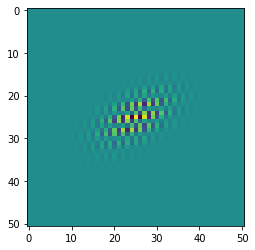

In [ ]:
kernel1=cv2.getGaborKernel((50,50),3,np.pi/3,np.pi/3,0.5,0,ktype=cv2.CV_32F)
plt.imshow(kernel1)

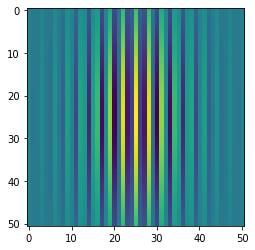

In [ ]:
kernel1=cv2.getGaborKernel((50,50),10,np.pi,np.pi,0.5,0,ktype=cv2.CV_32F)
plt.imshow(kernel1)

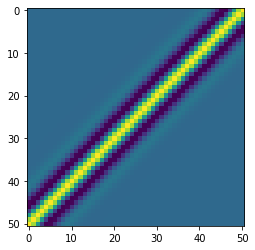

In [ ]:
kernel1=cv2.getGaborKernel((50,50),3,np.pi/4,np.pi/4,0.01,0,ktype=cv2.CV_32F)
plt.imshow(kernel1)

In [ ]:
from google.colab.patches import cv2_imshow

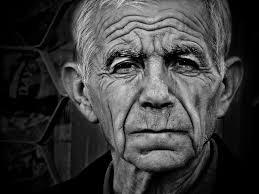

In [ ]:
img_clr=cv2.imread('/content/wrinkledFace.jpg')
img_bw=cv2.cvtColor(img_clr,cv2.COLOR_BGR2GRAY)


cv2_imshow(img_bw)


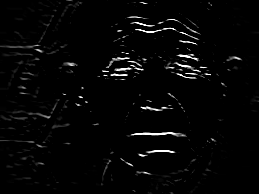

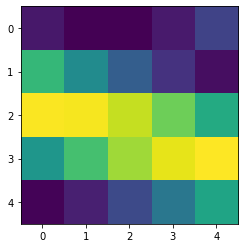

In [ ]:
fkernel=cv2.getGaborKernel((5,5),30,np.pi/8,np.pi/10,0.05,0.6,ktype=cv2.CV_32F)
plt.imshow(fkernel)

fimg=cv2.filter2D(img_bw,cv2.CV_8UC3,fkernel)


cv2_imshow(fimg)
cv2.waitKey()
cv2.destroyAllWindows()

# Bank of filters

In [ ]:
import pandas as pd


In [ ]:
img2=img_bw.reshape(-1)

In [ ]:
img_bw.shape

(194, 259)

In [ ]:
img2.shape

(50246,)

In [ ]:
df=pd.DataFrame()
df['Original Image']=img2

In [ ]:
num=1
kernels=[]
for theta in (4,8):
  theta=1/theta * np.pi
  for sigma in (3,15,20):
    for lamda in (np.pi/8,np.pi/9,np.pi/10):
      for gamma in (0.05,0.08,0.01,0.1):
        gabor_label='Gabor'+str(num)
        ksize=5
        phi=0.8
        kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
        kernels.append(kernel)

        fimg=cv2.filter2D(img2,cv2.CV_8UC3,kernel)
        #cv2_imshow(fimg)
        filtered_img =fimg.reshape(-1)
        cv2.imwrite('/content/images_v8/'+gabor_label+'.jpg',filtered_img.reshape(img_bw.shape))
        df[gabor_label]=filtered_img
        print(gabor_label,': theta= ',theta,': sigma=',sigma,': lamda=',lamda,': gamma=',gamma)
        num+=1

print(df.head())       

Gabor1 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.39269908169872414 : gamma= 0.05
Gabor2 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.39269908169872414 : gamma= 0.08
Gabor3 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.39269908169872414 : gamma= 0.01
Gabor4 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.39269908169872414 : gamma= 0.1
Gabor5 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3490658503988659 : gamma= 0.05
Gabor6 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3490658503988659 : gamma= 0.08
Gabor7 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3490658503988659 : gamma= 0.01
Gabor8 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3490658503988659 : gamma= 0.1
Gabor9 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3141592653589793 : gamma= 0.05
Gabor10 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3141592653589793 : gamma= 0.08
Gabor11 : theta=  0.7853981633974483 : sigma= 3 : lamda= 0.3141592653589793 : gamma= 0.01
Gabor12 : theta= 

# New Section

In [ ]:
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))
import os
import zipfile
zipf = zipfile.ZipFile('images_v8.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('/content/images_v8', zipf)
zipf.close()